<a href="https://colab.research.google.com/github/pratap-nitjsr/Driver-Drowsiness/blob/main/Driver_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratapkr","key":"b64cf68d0e716de57bf1439b2bc771d5"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d hazemfahmy/openned-closed-eyes

 98% 518M/526M [00:04<00:00, 118MB/s] 
100% 526M/526M [00:04<00:00, 128MB/s]


In [5]:
!unzip /content/openned-closed-eyes.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./TestSet_json/TestSet_json/4419.json  
  inflating: ./TestSet_json/TestSet_json/44194.json  
  inflating: ./TestSet_json/TestSet_json/44195.json  
  inflating: ./TestSet_json/TestSet_json/44208.json  
  inflating: ./TestSet_json/TestSet_json/4424.json  
  inflating: ./TestSet_json/TestSet_json/44241.json  
  inflating: ./TestSet_json/TestSet_json/44246.json  
  inflating: ./TestSet_json/TestSet_json/4425.json  
  inflating: ./TestSet_json/TestSet_json/44271.json  
  inflating: ./TestSet_json/TestSet_json/44286.json  
  inflating: ./TestSet_json/TestSet_json/44294.json  
  inflating: ./TestSet_json/TestSet_json/4430.json  
  inflating: ./TestSet_json/TestSet_json/4431.json  
  inflating: ./TestSet_json/TestSet_json/44331.json  
  inflating: ./TestSet_json/TestSet_json/44340.json  
  inflating: ./TestSet_json/TestSet_json/44341.json  
  inflating: ./TestSet_json/TestSet_json/44354.json  
  inflating: ./TestSet_json/TestSet_

In [6]:
tpath = '/content/TrainingSet/TrainingSet'
vpath = '/content/TestSet/TestSet'

In [7]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [8]:
training_data = keras.preprocessing.image_dataset_from_directory(
    vpath,
    batch_size =32,
    image_size =(227,227),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.01
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 32,
    image_size =(227,227),

    shuffle = True,
    seed =123,
    validation_split =0.99,
    subset ='validation'

    )

Found 4232 files belonging to 2 classes.
Using 4190 files for training.
Found 1704 files belonging to 2 classes.
Using 1686 files for validation.


In [9]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(227,227,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0001), metrics=['accuracy'])

In [11]:
epochs=50
history = resnet_model.fit(

  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/50
131/131 [==============================] - 31s 182ms/step - loss: 0.7287 - accuracy: 0.5451 - val_loss: 0.6128 - val_accuracy: 0.6702
Epoch 2/50
131/131 [==============================] - 20s 148ms/step - loss: 0.5503 - accuracy: 0.7544 - val_loss: 0.4941 - val_accuracy: 0.8149
Epoch 3/50
131/131 [==============================] - 21s 152ms/step - loss: 0.4548 - accuracy: 0.8589 - val_loss: 0.4222 - val_accuracy: 0.8796
Epoch 4/50
131/131 [==============================] - 20s 153ms/step - loss: 0.3950 - accuracy: 0.8902 - val_loss: 0.3757 - val_accuracy: 0.8992
Epoch 5/50
131/131 [==============================] - 21s 159ms/step - loss: 0.3550 - accuracy: 0.9041 - val_loss: 0.3435 - val_accuracy: 0.9116
Epoch 6/50
131/131 [==============================] - 25s 191ms/step - loss: 0.3265 - accuracy: 0.9126 - val_loss: 0.3199 - val_accuracy: 0.9170
Epoch 7/50
131/131 [==============================] - 21s 155ms/step - loss: 0.3053 - accuracy: 0.9184 - val_loss: 0.3018 - val_ac

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

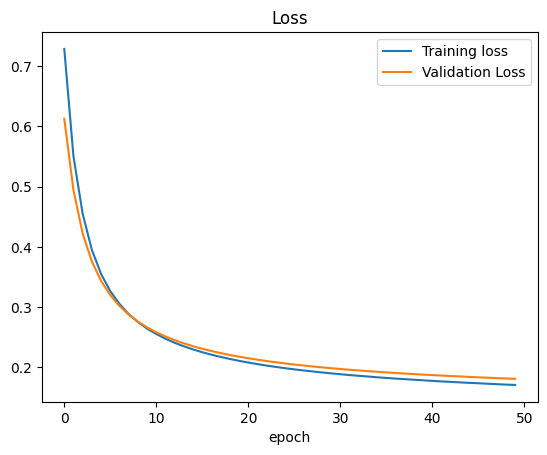

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation Loss'])
plt.show()

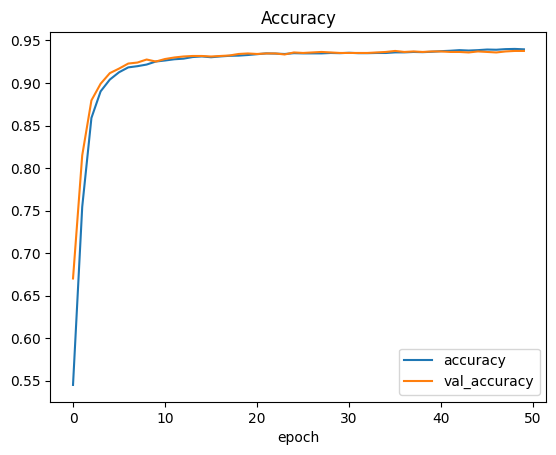

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [15]:
resnet_model.save('./final_model.keras')